# Seaborn(sns)官方文档学习笔记（第五章 分类数据的绘制）

## 第五章 分类数据的绘制

我们之前探讨了如何使用散点图和回归模型拟合来可视化两个变量之间的关系，以及如何在其他分类变量的层次之间进行展示。 当然，还有一大类问题就是分类数据的问题了？ 在这种情况下，散点图和回归模型方法将不起作用。当然，有几个观察可视化这种关系的选择，我们将在本章中讨论。

非常实用的方法是将Seaborn的分类图分为三类，将分类变量每个级别的每个观察结果显示出来，显示每个观察分布的抽象表示，以及应用统计估计显示的权重趋势和置信区间：

第一个包括函数swarmplot()和stripplot()
第二个包括函数boxplot()和violinplot()
第三个包括函数barplot()和pointplt()
在了解他们如何接受数据传入方面，尽管每个参数都聚有控制应用于该数据可视化细节的特定参数，但这些功能都共享一个基本的API。

这与之前的regplot()和lmplot()的关系非常相似（未禾备注：在seaborn的构架中很容易分成这样两类用途相似，使用有所差异的替代方案函数）。在Seaborn中，相对低级别和相对高级别的方法用于定制分类数据的绘制图，上面列出的函数都是低级别的，他们绘制在特定的matplotlib轴上。还有更高级别的factorplot()（未禾备注：这是一个非常简明的快速绘制函数，具体用法会在最后有详细介绍），它将这些功能与FacetGrid结合，以便在面板的网格中应用分类图像。

使用“整洁”格式的DataFrame调用这些函数是最简单和最好的，尽管较低级别的函数也接受宽形式的DataFrames或简单的观察向量。见下面的例子。
> 未禾备注：你甚至可以理解为这一章都是在具体学习factorplot()函数，快速、直接、功能强大的绘图函数谁不爱？

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

np.random.seed(sum(map(ord, "categorical")))
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

## 分类散点图

显示分类变量级别中某些定量变量的值的一种简单方法使用stripplot()，它会将分散图概括为其中一个变量是分类的：

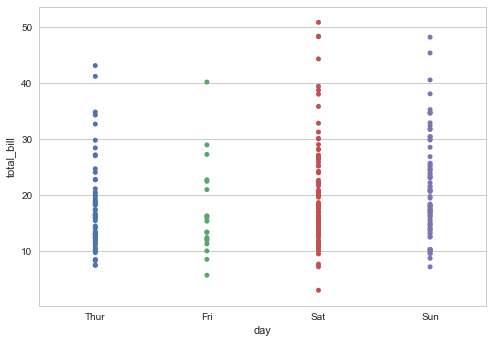

In [3]:
sns.stripplot(x="day", y="total_bill", data=tips);

在条纹图中，散点图通常将重叠。这使得很难看到数据的完整分布。一个简单的解决方案是使用一些随机的“抖动”调整位置（仅沿着分类轴）

未禾备注:
> 抖动是平时可视化中的常用的观察“密度”的方法，除了使用参数抖动，特定的抖动需求也可以用numpy在数据上处理实现

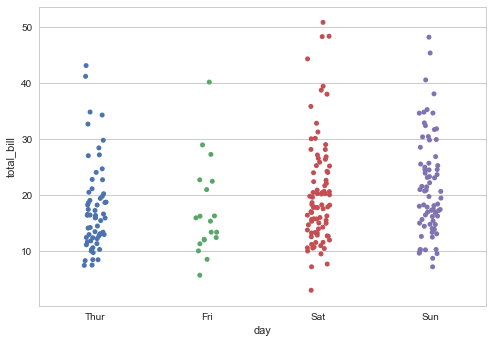

In [4]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

不同的方法是使用函数swarmplot()，它使用避免重叠点的算法将分类轴上的每个散点图点定位：

未禾备注：
> 道理上，即使抖动还是会有重叠的可能，所以这种方法可能更好

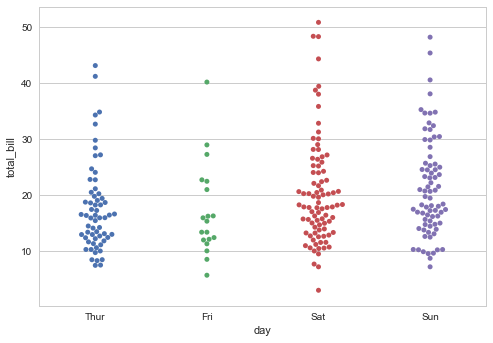

In [5]:
sns.swarmplot(x="day", y="total_bill", data=tips);

当然也可以传入hue参数添加多个嵌套的分类变量。高于分类轴上的颜色和位置时冗余的，现在每个都提供有两个变量之一的信息：

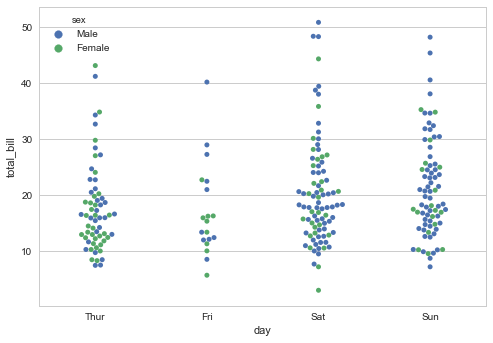

In [6]:
sns.swarmplot(x="day", y="total_bill", hue="sex",data=tips);

一般来说，Seaborn分类绘图功能试图从数据中推断类别的顺序。 如果您的数据有一个pandas分类数据类型，那么类别的默认顺序可以在那里设置。 对于其他数据类型，字符串类型的类别将按照它们在DataFrame中显示的顺序进行绘制，但是数组类别将被排序：

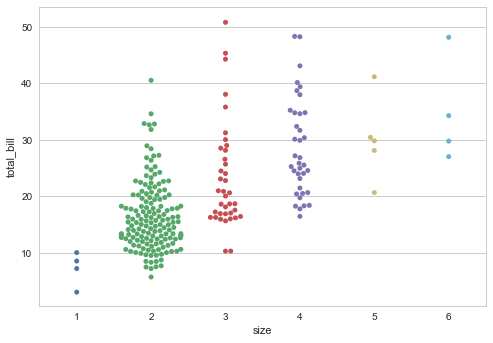

In [7]:
sns.swarmplot(x="size", y="total_bill", data=tips);

使用这些图，将分类变量放在垂直轴上是非常有用的（当类别名称相对较长或有很多类别时，这一点特别有用）。 您可以使用orient关键字强制定向，但通常可以从传递给x和/或y的变量的数据类型推断绘图方向：

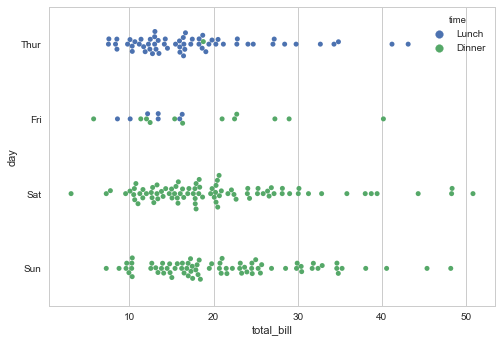

In [8]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips);

## 分类内的观测分布

分类散点图固然简单实用，但在某些特定的的情况下，他们可以提供的值的分布信息会变得及其有限（并不明晰）。 有几种方式可以方便的解决这个问题，在类别之间进行简单比较并汇总信息，我们快速讨论并比较一些适合这类数据观测的函数。

### 箱线图

第一个是熟悉的boxplot()。这种图形显示了分布的三个四分位值与极值。“晶须”延伸到低于和低四分位数的1.5 IQR内的点，然后独立显示落在该范围之外的观测值。 重要的是，这意味着boxplot中的每个值的显示都对应于数据中的实际观察值：

未禾备注：
> IQR即统计学概念四分位距，第一四分位与第三四分位之间的距离，具体内容请参考更深入的相关资料

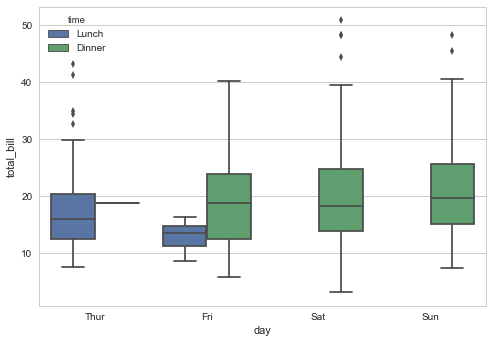

In [9]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

### 提琴图

不同的方法是一个violinplot()，它结合了箱体图和分布教程中描述的核心密度估计过程：

未禾备注：
> 核密度估计，即全文中提到的，或参数内传入的kde，具体概念内容请参考相关文档

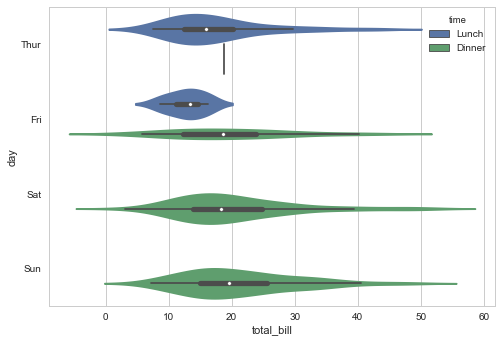

In [10]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

这种方法使用核密度估计来更好地描述值的分布。此外，小提琴内还显示了箱体四分位数和晶须值。由于小提琴使用KDE，还有一些其他可以调整的参数，相对于简单的boxplot增加了一些复杂性：

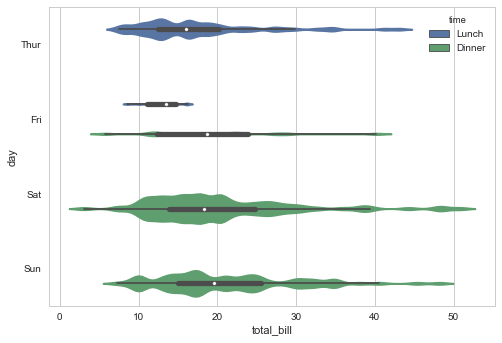

In [11]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips,
               bw=.1, scale="count", scale_hue=False);

当色调参数只有两个级别时，也可以传入参数split至violinplot()，这样可以更有效地利用空间：

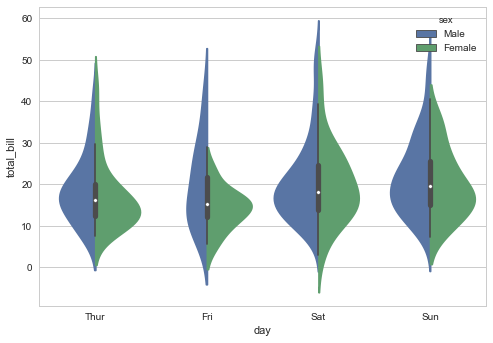

In [12]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

最后，在绘制提琴图的时候有几个选项，包括显示每个人的观察结果而不是总结框图值的方法：

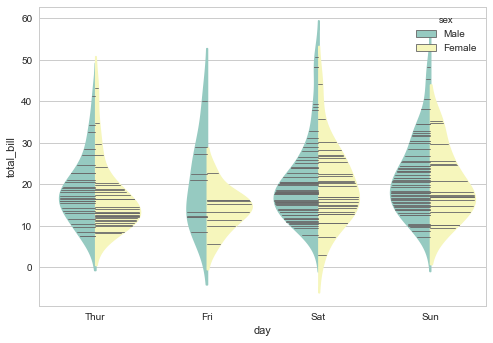

In [13]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,
               split=True, inner="stick", palette="Set3");

将swarmplot()或者swarmplot()与violinplot()或boxplot()结合使用可以显示每个观察结果以及分布的摘要：

未禾备注：
> 说实话，并不推荐这么做，过多的信息除了炫技没有什么实际用处。

## 类别内的统计估计

通常，不是显示每个类别中的分布，你可能希望显示值的集中趋势。 Seaborn有两种显示此信息的主要方法，但重要的是，这些功能的基本API与上述相同。（未禾：这是多么令人愉悦的事情）

### 条形图

最熟悉的方式完成这个目标是一个条形图。 在Seaborn中barplot()函数在完整数据集上运行，并显示任意估计，默认情况下使用均值。 当在每个类别中有多个观察值时，它还使用引导来计算估计周围的置信区间，并绘制使用误差条：

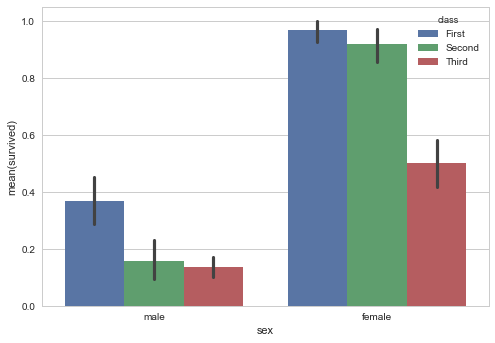

In [14]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

条形图的特殊情况是当您想要显示每个类别中的观察次数，而不是计算第二个变量的统计量。这类似于分类而不是定量变量的直方图。在Seaborn中，使用countplot()函数很容易绘制：

未禾备注：
> 函数将默认使用count参数作为x/y中未传的一组维度

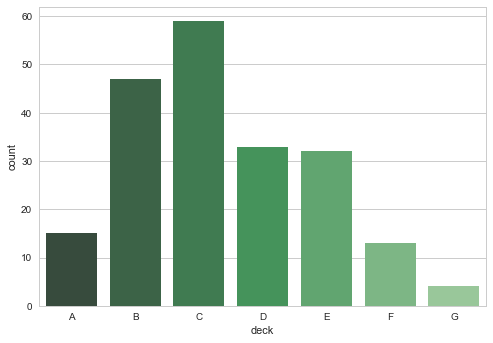

In [15]:
sns.countplot(x="deck", data=titanic, palette="Greens_d");

可以使用上面讨论的所有选项来调用barplot()和countplot()，以及在每个函数的详细文档中的其他选项：

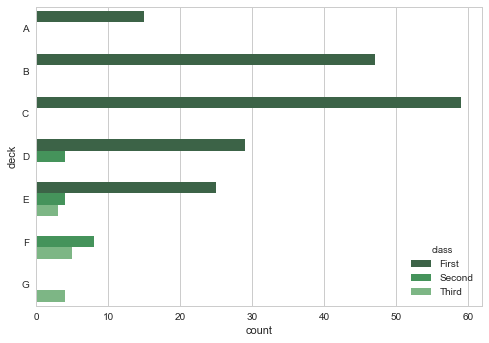

In [16]:
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d");

### 点图

pointplot()函数提供了可视化相同信息的另一种风格。该函数还对另一轴的高度估计值进行编码，而不是显示一个完整的柱型，它只绘制点估计和置信区间。另外，点图连接相同hue类别的点。这使得很容易看出主要关系如何随着第二个变量的变化而变化，因为你的眼睛很好地收集斜率的差异：

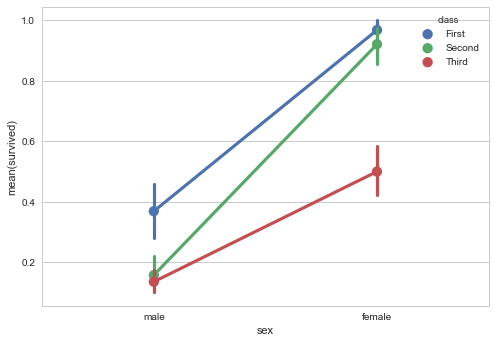

In [17]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

为了使能够在黑白中重现的图形，可以使用不同的标记和线条样式来展示不同hue类别的层次:

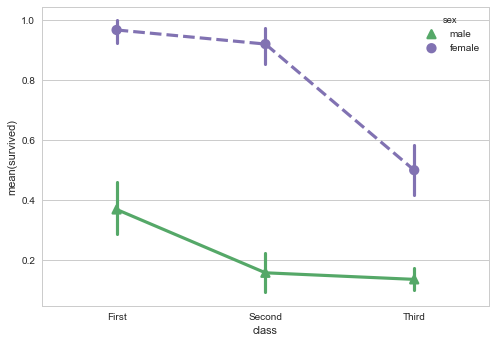

In [18]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

### 绘制“宽格式”数据

虽然使用“长格式”或“整洁”数据是优选的，但是这些功能也可以应用于各种格式的“宽格式”数据，包括pandas DataFrame或二维numpy数组阵列。这些对象应该直接传递给数据参数：

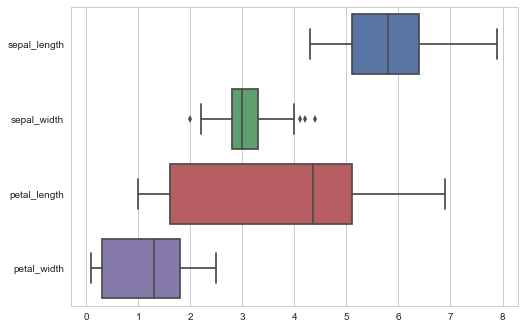

In [19]:
sns.boxplot(data=iris,orient="h");

此外，这些函数接受Pandas或numpy对象的向量，而不是DataFrame中的变量

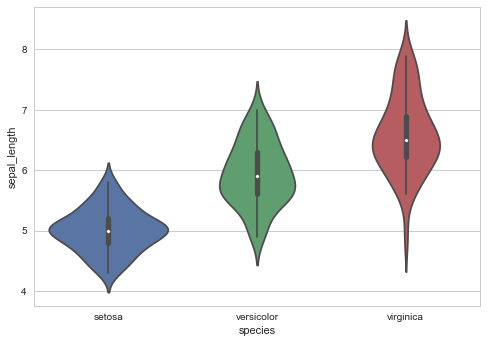

In [20]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

为了控制由上述功能制作的图形的大小和形状，您必须使用matplotlib命令自己设置图形。 当然，这也意味着这些图块可以和其他种类的图块一起在一个多面板的绘制中共存：

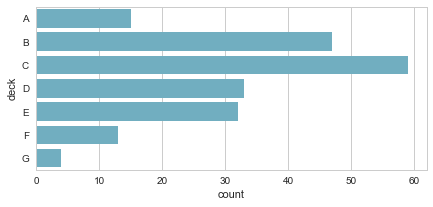

In [21]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

## 绘制多层面板分类图

正如我们上面提到的，有两种方法可以在Seaborn中绘制分类图。与回归图中的二元性相似，您可以使用上面介绍的函数，也可以使用更高级别的函数factorplot()，将这些函数与FacetGrid()相结合，通过这个图形的更大的结构来增加展示其他类别的能力。 默认情况下，factorplot()产生一个pairplot()：

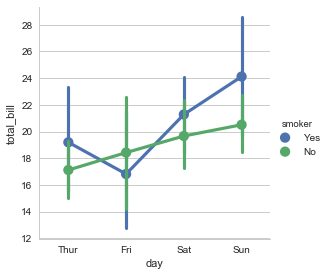

In [22]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips);

然而，kind参数可以让您选择以上讨论的任何种类的图：

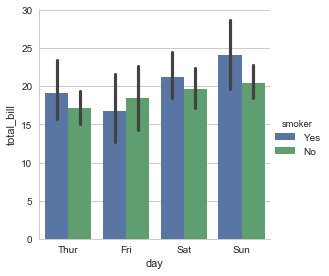

In [23]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar");

使用factorplot()的主要优点是很容易调用"facet"展开更多其他分类变量：

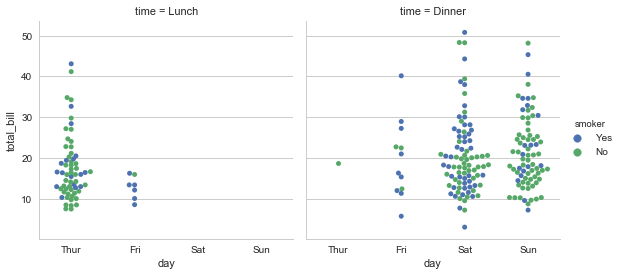

In [24]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm");

任何一种图形都可以画出来。基于FacetGrid的工作原理，要更改图形的大小和形状，需要指定适用于每个方面的size和aspect参数：

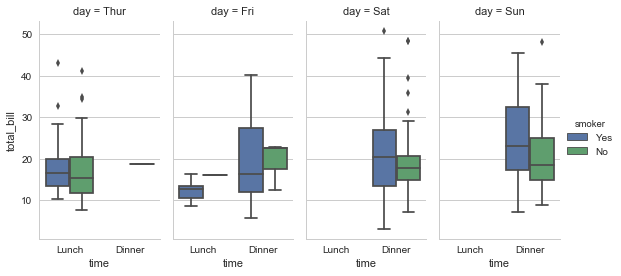

In [25]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5);

重要的是要注意，你也可以直接使用boxplot()和FacetGrid来制作这个图。但是，必须特别注意确保分类变量的顺序在每个方面实施，方法是使用具有Categorical数据类型的数据或通过命令和hue_order。

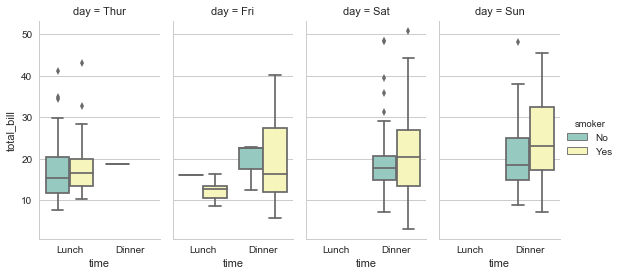

In [26]:
sns.factorplot(x="time", y="total_bill", hue="smoker",hue_order=["No","Yes"]
               ,col="day", data=tips, kind="box", size=4, aspect=.5,
              palette="Set3");

由于分类图的广义API，它们应该很容易应用于其他更复杂的上下文。 例如，它们可以轻松地与PairGrid结合，以显示多个不同变量之间的分类关系：

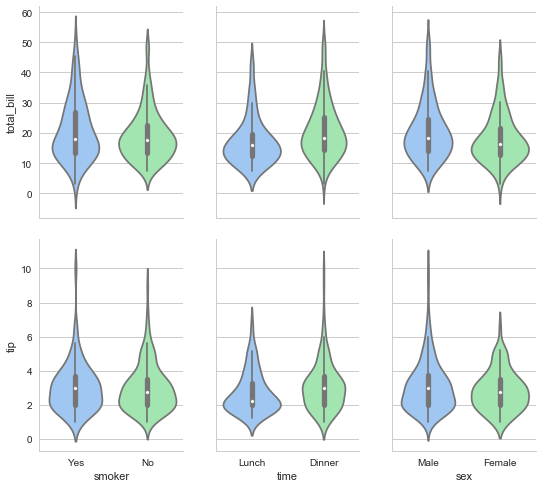

In [27]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");

**补充资料**

最后在这章翻译结束后，未禾专门收集了这个重要函数的所有参数说明，方便参考：

seaborn.factorplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean>, ci=95, n_boot=1000, units=None, order=None, hue_order=None, row_order=None, col_order=None, kind='point', size=4, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)

Parameters：

    - x,y,hue 数据集变量 变量名
    - date 数据集 数据集名
    - row,col 更多分类变量进行平铺显示 变量名
    - col_wrap 每行的最高平铺数 整数
    - estimator 在每个分类中进行矢量到标量的映射 矢量
    - ci 置信区间 浮点数或None
    - n_boot 计算置信区间时使用的引导迭代次数 整数
    - units 采样单元的标识符，用于执行多级引导和重复测量设计 数据变量或向量数据
    - order, hue_order 对应排序列表 字符串列表
    - row_order, col_order 对应排序列表 字符串列表
    - kind : 可选：point 默认, bar 柱形图, count 频次, box 箱体, violin 提琴, strip 散点，swarm 分散点（具体图形参考文章前部的分类介绍）
    - size 每个面的高度（英寸） 标量
    - aspect 纵横比 标量
    - orient 方向 "v"/"h"
    - color 颜色 matplotlib颜色
    - palette 调色板 seaborn颜色色板或字典
    - legend hue的信息面板 True/False
    - legend_out 是否扩展图形，并将信息框绘制在中心右边 True/False
    - share{x,y} 共享轴线 True/False/generated/seaborn.FacetGrid.html%23s
    - facet_kws  [FacetGrid](http://link.zhihu.com/?target=http%3A//seaborn.pydata.orgeaborn.FacetGrid)的其他参数字典

**感慨**

终于抽时间把最重要的三章翻译完了，有了这三章seaborn在数据挖掘中已经可以覆盖到大部分数据格式，其快速做图能力已经可以得到足量的发挥。最近工作压力日趋增大，全文还有最难翻译的一章，会坚持在最近放出。最后吐槽下知乎的排版，代码+贴图非常不方便，费时费力唉。

如果文章对你有帮助，请不吝点个赞，方便更多的小伙伴能看到。

如果文章有理解、翻译谬误请留言，十分感谢！



**【第五章完】**